In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import join
from desitarget.targets import desi_mask
from collections import Counter
from astropy.table import Table

/usr/local/lib/python2.7/dist-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [4]:
truth_file = "/home/forero/Data/desitest/mtl/truth.fits"
sky_file = "/home/forero/Data/desitest/mtl/sky.fits"
star_file =  "/home/forero/Data/desitest/mtl/stdstars.fits"

truth = Table.read(truth_file)
sky = Table.read(sky_file)
star = Table.read(star_file)
true_types = list(set(truth['TRUETYPE']))
print truth.colnames
print true_types

['TARGETID', 'BRICKNAME', 'RA', 'DEC', 'TRUEZ', 'TRUETYPE', 'CATEGORY']
['STAR', 'QSO', 'GALAXY', 'UNKNOWN']


In [5]:
def print_stats_total(truth, base_path="./", n_epoch=6):
    print("TOTAL EFFICIENCIES")
    print("==================")
    epoch = 0
    mtl_file = base_path+"{}/mtl.fits".format(epoch)
    mtl = Table.read(mtl_file)    
    tmp_init = join(mtl, truth, keys='TARGETID')
    
    for epoch in range(n_epoch):
        print('Epoch {}'.format(epoch))
        zcat_file = base_path+"{}/zcat.fits".format(epoch)
        zcat = Table.read(zcat_file) 
        
        total = join(zcat, tmp_init, keys='TARGETID')

        # print total.colnames
        true_types = ['LRG', 'ELG', 'QSO']
        zcat_types = ['GALAXY', 'GALAXY', 'QSO']
    
        for true_type, zcat_type in zip(true_types, zcat_types):
            i_initial = ((tmp_init['DESI_TARGET'] & desi_mask.mask(true_type)) != 0) & (tmp_init['TRUETYPE'] == zcat_type)
            i_final = ((total['DESI_TARGET'] & desi_mask.mask(true_type)) != 0) & (total['TYPE'] == zcat_type) 
            
            n_t = 1.0*len(total['TARGETID'][i_final])
            n_i = 1.0*len(tmp_init['TARGETID'][i_initial])
            print("\t {} fraction : {}".format(true_type, n_t/n_i))
        print("\t TRUE:ZCAT\n\t {}\n".format(Counter(zip(total['DESI_TARGET'], total['TYPE']))))
        #print("\t TRUE:NUMOBS\n\t {}\n".format(Counter(zip(total['DESI_TARGET'], total['NUMOBS_MORE']))))

In [6]:
def print_stats_mtl(base_path="./", n_epoch=6):
    print("MTL EFFICIENCIES")
    print("================")
    for j in range(n_epoch):
        print('PASS {}'.format(j))
        mtl_file = base_path+"{}/mtl.fits".format(j)
        mtl = Table.read(mtl_file)
        
        ii = (mtl['DESI_TARGET'] & desi_mask.QSO) != 0
        n = len(mtl['NUMOBS_MORE'][ii])
        if j == 0: n_qso = n
        print('\t QSO f_unobs:{} - {}'.format(1.0*n/n_qso, Counter(mtl['NUMOBS_MORE'][ii])))
    
        ii = (mtl['DESI_TARGET'] & desi_mask.ELG) != 0
        n = len(mtl['NUMOBS_MORE'][ii])
        if j == 0: n_elg = n
        print('\t ELG f_unobs:{} - {}'.format(1.0*n/n_elg, Counter(mtl['NUMOBS_MORE'][ii])))
    
        ii = (mtl['DESI_TARGET'] & desi_mask.LRG) != 0
        n = len(mtl['NUMOBS_MORE'][ii])
        if j == 0: n_lrg = n
        print('\t LRG f_unobs:{} - {}'.format(1.0*n/n_lrg, Counter(mtl['NUMOBS_MORE'][ii])))
    
        ii = (mtl['DESI_TARGET'] & desi_mask.SKY) != 0
        print('SKY {}'.format(Counter(mtl['NUMOBS_MORE'][ii])))

        
def print_stats_zcat(truth, base_path="./", n_epoch = 6):
    print("REDSHIFT EFFICIENCIES")
    print("=======================")

    for epoch in range(n_epoch):
        zcat_file = base_path+"{}/zcat.fits".format(epoch)
        zcat = Table.read(zcat_file)
        print('Epoch {}'.format(epoch))
        for true_type in true_types:
            ii = (zcat['TYPE'] == true_type)
            jj = (truth['TRUETYPE'] == true_type)
            n_obs  = 1.0 * len(zcat['Z'][ii])
            n_total = 1.0 * len(truth['TRUEZ'][jj])
            print("\t {} : {}".format(true_type, n_obs/n_total))

In [7]:
base_path = "/home/forero/Data/desitest/lowfat_perfect/"
print_stats_zcat(truth ,base_path=base_path)
print_stats_total(truth, base_path=base_path)

REDSHIFT EFFICIENCIES
Epoch 0
	 STAR : 0.714227337738
	 QSO : 0.713367749111
	 GALAXY : 0.137832061184
	 UNKNOWN : 0.475852710788
Epoch 1
	 STAR : 0.919861971895
	 QSO : 0.919747563895
	 GALAXY : 0.286744009812
	 UNKNOWN : 0.793211209112
Epoch 2
	 STAR : 0.966548616314
	 QSO : 0.966184684576
	 GALAXY : 0.442030248112
	 UNKNOWN : 0.924176072699
Epoch 3
	 STAR : 0.980203863879
	 QSO : 0.979900621418
	 GALAXY : 0.608575526734
	 UNKNOWN : 0.961800201484
Epoch 4
	 STAR : 0.980203863879
	 QSO : 0.979900621418
	 GALAXY : 0.776621683168
	 UNKNOWN : 0.961800201484
Epoch 5
	 STAR : 0.984608050126
	 QSO : 0.984657978093
	 GALAXY : 0.70007804867
	 UNKNOWN : 0.879664466786
TOTAL EFFICIENCIES
Epoch 0
	 LRG fraction : 0.465994797769
	 ELG fraction : 0.0972737727391
	 QSO fraction : 0.713367749111
	 TRUE:ZCAT
	 Counter({(2, 'GALAXY'): 229056, (1, 'GALAXY'): 135618, (4, 'QSO'): 118011, (4, 'STAR'): 62922, (1, 'UNKNOWN'): 23145})

Epoch 1
	 LRG fraction : 0.784251741235
	 ELG fraction : 0.22525603502
	 

In [21]:
base_path = "/home/forero/Data/desitest/lowfat/"
print_stats_zcat(truth ,base_path=base_path)
print_stats_total(truth, base_path=base_path)

REDSHIFT EFFICIENCIES
Epoch 0
	 STAR : 0.713954913846
	 QSO : 0.71356118674
	 GALAXY : 0.137818076677
	 UNKNOWN : 0.474619132795
Epoch 1
	 STAR : 0.921348952303
	 QSO : 0.922189713954
	 GALAXY : 0.279383245426
	 UNKNOWN : 0.776886860338
Epoch 2
	 STAR : 0.969102590297
	 QSO : 0.969086249003
	 GALAXY : 0.42637478102
	 UNKNOWN : 0.905939678036
Epoch 3
	 STAR : 0.982678380894
	 QSO : 0.982264187441
	 GALAXY : 0.583481651003
	 UNKNOWN : 0.952383889471
Epoch 4
	 STAR : 0.982678380894
	 QSO : 0.982264187441
	 GALAXY : 0.75785674195
	 UNKNOWN : 0.952383889471
Epoch 5
	 STAR : 0.985107493927
	 QSO : 0.984524989724
	 GALAXY : 0.700036473107
	 UNKNOWN : 0.879643907153
TOTAL EFFICIENCIES
Epoch 0
	 LRG fraction : 0.466080699862
	 ELG fraction : 0.0972474430472
	 QSO fraction : 0.71356118674
	 TRUE:ZCAT
	 Counter({(2, 'GALAXY'): 228994, (1, 'GALAXY'): 135643, (4, 'QSO'): 118043, (4, 'STAR'): 62898, (1, 'UNKNOWN'): 23085})

Epoch 1
	 LRG fraction : 0.76659714324
	 ELG fraction : 0.219167506103
	 QSO

In [14]:
def compare_fibermaps(base_path_A="./", base_path_B="./", tile_id=0, epoch=0):
    fiber_file_A = "%s/%d/fiberassign/tile_%05d.fits"%(base_path_A, epoch, tile_id)
    fiber_file_B = "%s/%d/fiberassign/tile_%05d.fits"%(base_path_B, epoch, tile_id)

    fiberdata_A = Table.read(fiber_file_A, hdu=1)
    fiberdata_B = Table.read(fiber_file_B, hdu=1)

    ii_A = (fiberdata_A['TARGETID'] > 0)
    ii_B = (fiberdata_B['TARGETID'] > 0)
    intersection = list(set(fiberdata_A['TARGETID'][ii_A]) & set(fiberdata_B['TARGETID'][ii_B]))
    
    n_A = len(fiberdata_A['TARGETID'][ii_A])
    n_B = len(fiberdata_B['TARGETID'][ii_B])
    return 1.0*n_A/n_B, 1.0*len(intersection)/n_A

In [19]:
epoch  = 5
base_path_A = "/home/forero/Data/desitest/lowfat_perfect/"
base_path_B = "/home/forero/Data/desitest/lowfat/"

tile_files = glob.glob('{}/{}/fiberassign/tile*.fits'.format(base_path_A, epoch))
tile_id_list = []
for tile in tile_files:
    tilename = tile.split('/')[-1]
    tile_id_list.append(int(tilename.split('.')[0].split('_')[-1]))
tile_id_list.sort()
#print tile_id_list


ratio_used = []
ratio_intersection = []
for tile_id in tile_id_list:
    used, intersec = compare_fibermaps(base_path_A=base_path_A, base_path_B=base_path_B, tile_id=tile_id, epoch=epoch)
    ratio_used.append(used)
    ratio_intersection.append(intersec)

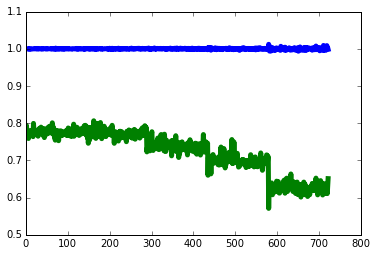

In [20]:
plt.plot(ratio_used, lw=5)
plt.plot(ratio_intersection, lw=5)